In [153]:
import pandas as pd

filename = "currencies.csv"
d_parser = lambda x: pd.datetime.strptime(x, '%Y%m%d')
currencies = pd.read_csv(filename, delimiter=',', parse_dates=['Date'], date_parser=d_parser, index_col=['Date'])
currencies.head(10)

/tmp/ipykernel_44465/2199217414.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y%m%d')


,EUR,GBP,JPY,reur,rgbp,rjpy,cvar_rjpy_stat,cvar_rjpy_dyn
Date,,,,,,,,
2002-07-07,1.0274,0.6575,120.21,NaN,NaN,NaN,0.239785,0.239785
2002-07-08,1.0261,0.6570,120.04,-0.126613,-0.076075,-0.141519,0.240821,0.240821
2002-07-09,1.0096,0.6474,118.40,-1.621099,-1.471968,-1.375630,0.226683,0.226683
2002-07-10,1.0065,0.6457,118.06,-0.307525,-0.262934,-0.287575,0.413358,0.413358
2002-07-11,1.0119,0.6463,117.69,0.535079,0.092879,-0.313892,0.276155,0.276155
2002-07-12,1.0114,0.6433,116.98,-0.049424,-0.465261,-0.605107,0.357691,0.357691
2002-07-13,1.0095,0.6439,116.87,-0.188035,0.093226,-0.094077,0.338464,0.338464
2002-07-14,1.0088,0.6439,116.91,-0.069365,0.000000,0.034220,0.317460,0.317460
2002-07-15,1.0085,0.6438,116.89,-0.029743,-0.015532,-0.017109,0.291283,0.291283


In [154]:
currencies['2002']['rgbp']

/tmp/ipykernel_44465/2141276588.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  currencies['2002']['rgbp']


Date
2002-07-07         NaN
2002-07-08   -0.076075
2002-07-09   -1.471968
2002-07-10   -0.262934
2002-07-11    0.092879
                ...   
2002-12-27   -0.239636
2002-12-28   -0.256246
2002-12-29    0.048096
2002-12-30   -0.016029
2002-12-31   -0.048104
Name: rgbp, Length: 178, dtype: float64

In [155]:
currencies.drop(labels=['2002-07-07'], axis=0, inplace=True)
rgbp = currencies['rgbp']
eur = currencies['EUR']
jpy = currencies['JPY']
rgbp

Date
2002-07-08   -0.076075
2002-07-09   -1.471968
2002-07-10   -0.262934
2002-07-11    0.092879
2002-07-12   -0.465261
                ...   
2013-06-02    0.091199
2013-06-03    0.000000
2013-06-04   -0.426310
2013-06-05   -0.320929
2013-06-06   -0.260557
Name: rgbp, Length: 3987, dtype: float64

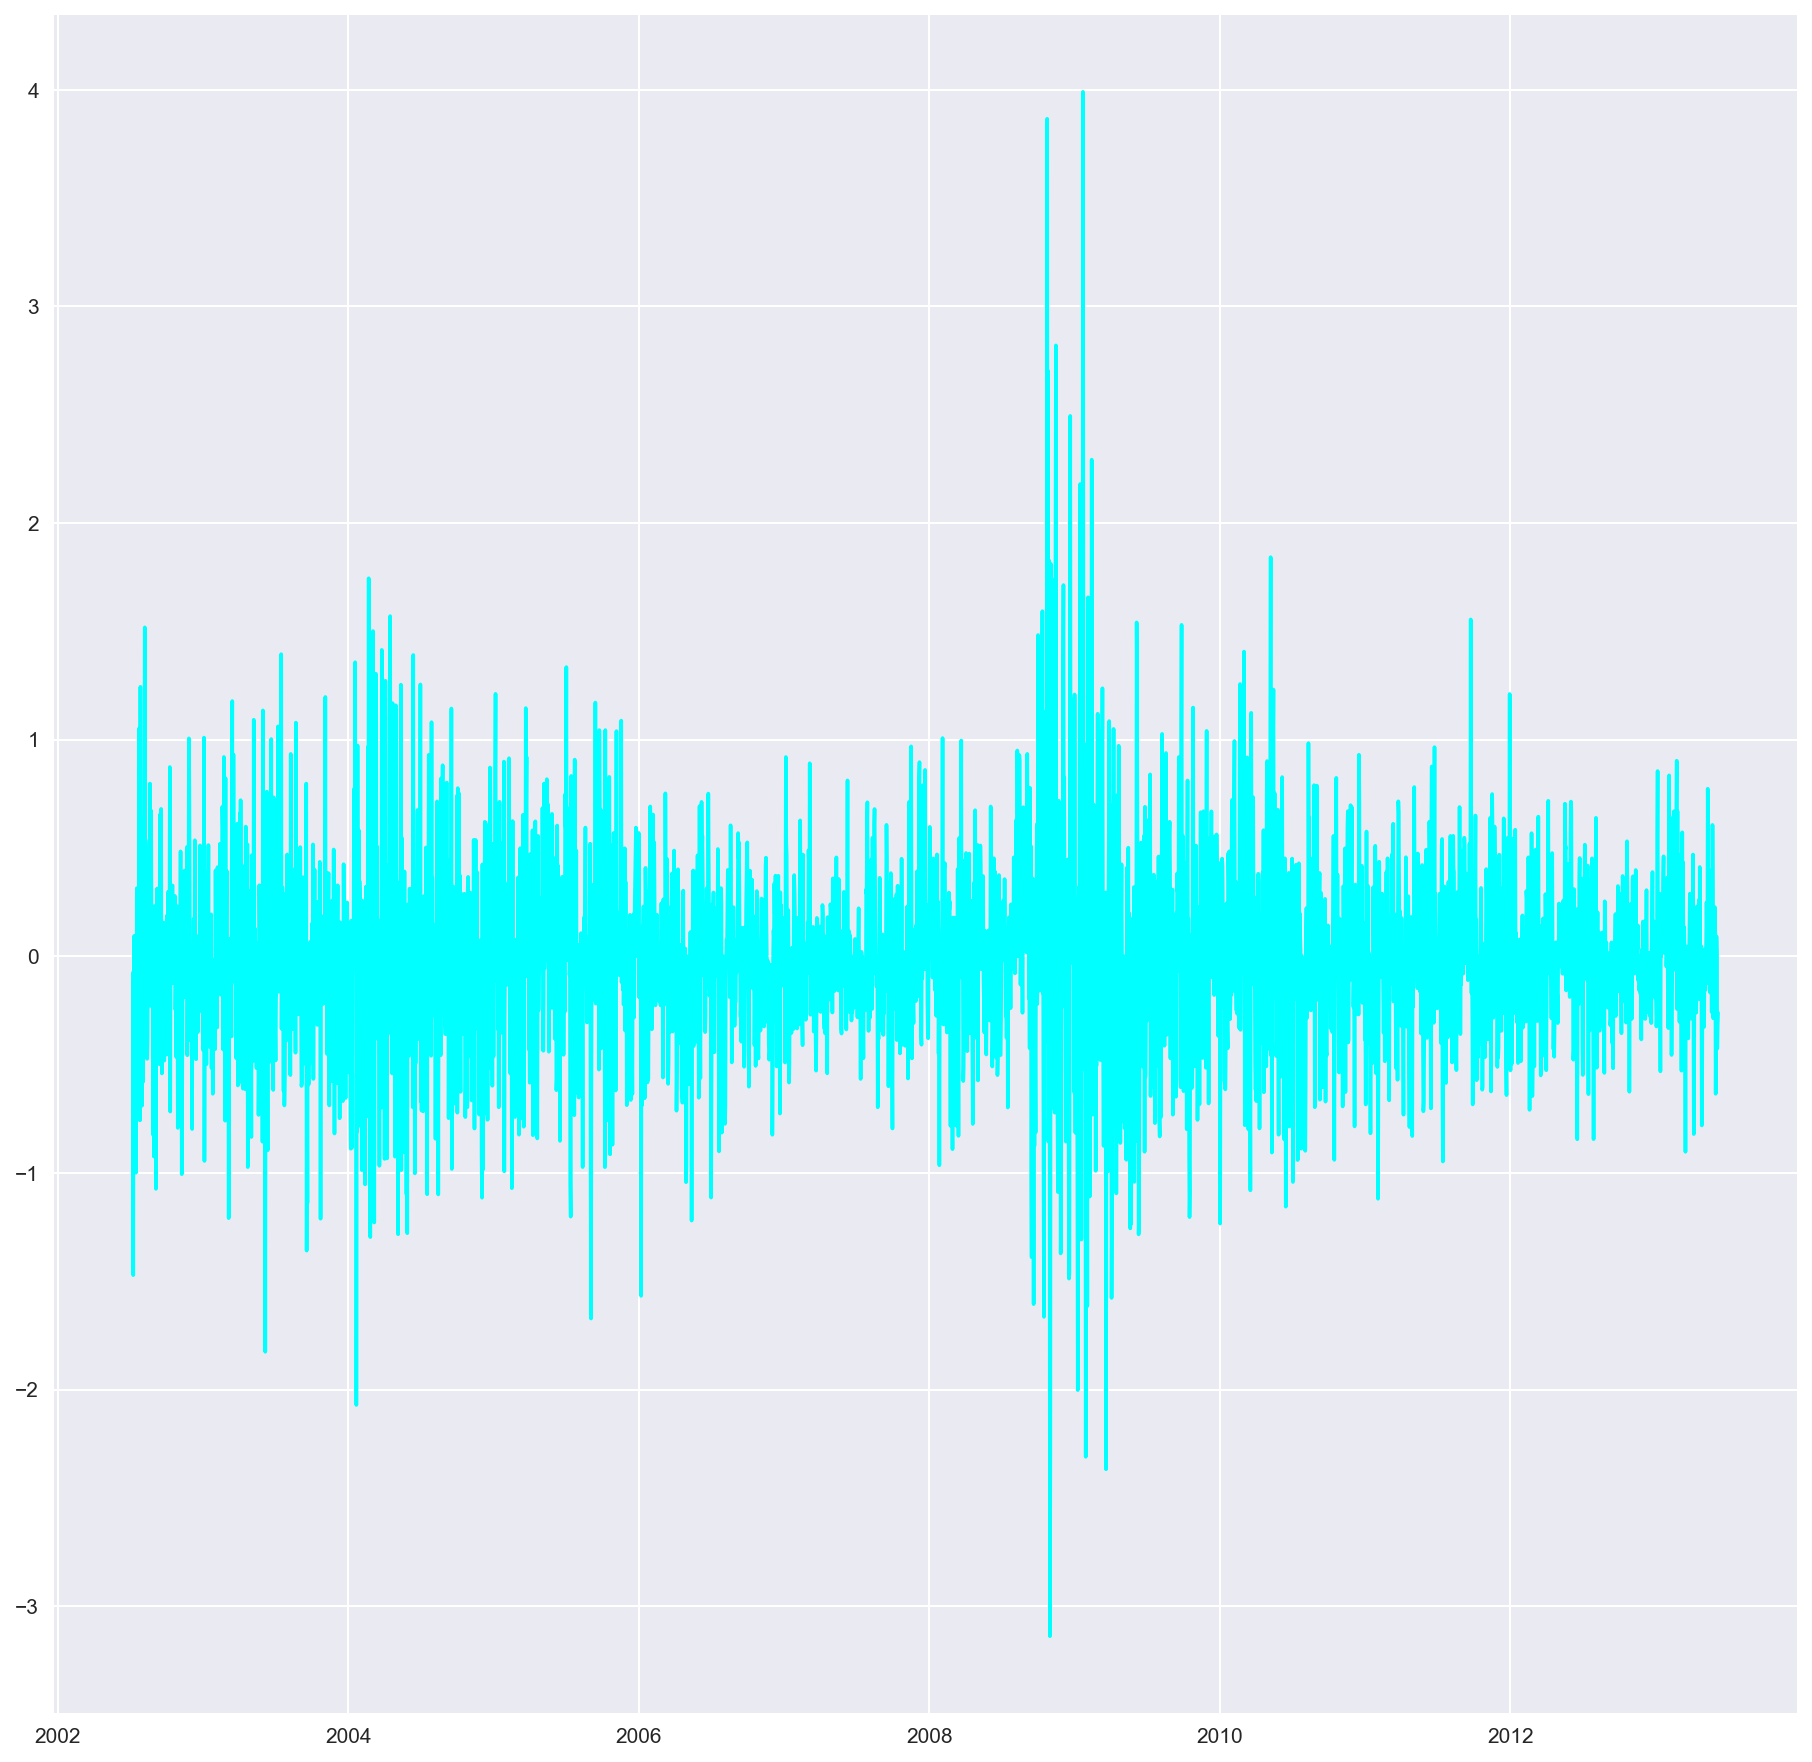

In [156]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure(figsize=(15,15), dpi=150)
plt.plot(rgbp, color='cyan')

Text(0.5, 1.0, 'jpy')

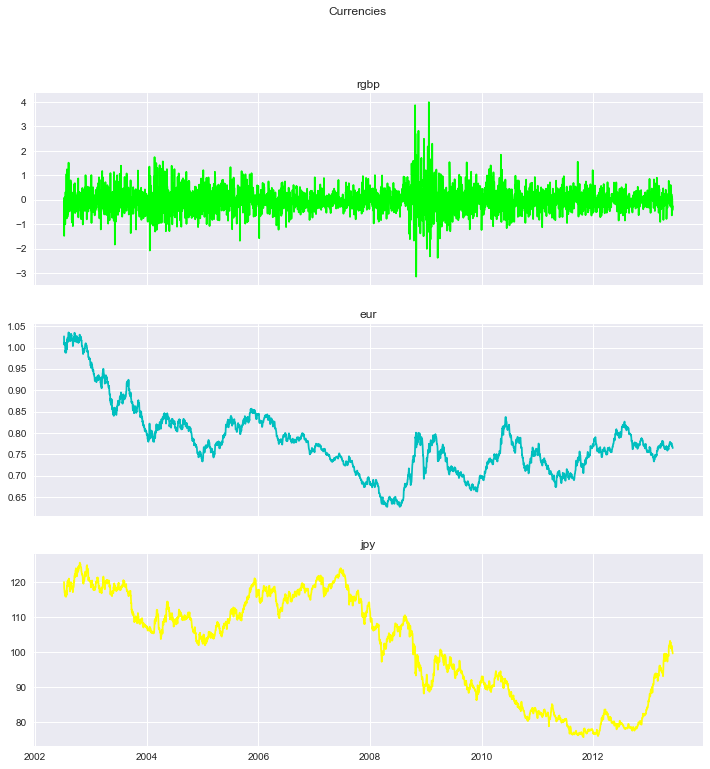

In [157]:
fig, axs = plt.subplots(3, sharex=True, figsize=(12,12))
fig.suptitle('Currencies')
axs[0].plot(rgbp, c='lime')
axs[0].set_title('rgbp')
axs[1].plot(eur, c='c')
axs[1].set_title('eur')
axs[2].plot(jpy, c='yellow')
axs[2].set_title('jpy')

((array([-3.57691482, -3.33797424, -3.20609404, ...,  3.20609404,
          3.33797424,  3.57691482]),
  array([-7.09418907, -5.35236765, -5.22218189, ...,  6.37414303,
          8.7385292 ,  9.0193939 ])),
 (0.9637404513886133, -1.0992185031630223e-16, 0.9629531467308808))

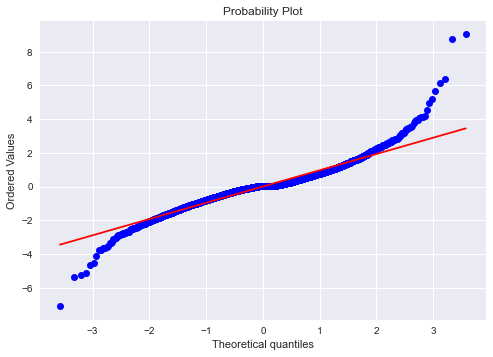

In [158]:
import numpy as np
from scipy import stats as scipy_stats

res_rgbp = rgbp - np.mean(rgbp)
res_eur =eur - np.mean(eur)
res_jpy = jpy - np.mean(jpy)

std_res_rgbp = res_rgbp/np.std(res_rgbp)
std_res_eur = res_eur/np.std(res_eur)
std_res_jpy = res_jpy/np.std(res_jpy)

scipy_stats.probplot(std_res_rgbp, dist="norm", plot=plt)

((array([-3.57691482, -3.33797424, -3.20609404, ...,  3.20609404,
          3.33797424,  3.57691482]),
  array([-1.90641215, -1.90011185, -1.89759173, ...,  3.22454918,
          3.23084947,  3.23966989])),
 (0.9679593939374798, -1.3650358239051521e-15, 0.9671686427157741))

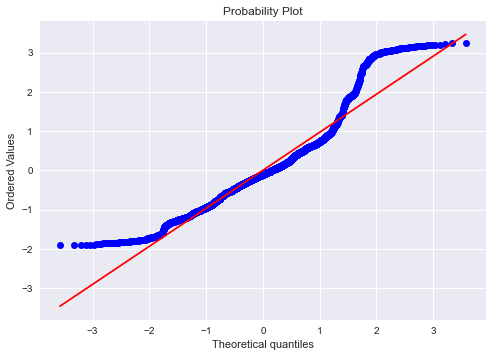

In [159]:
scipy_stats.probplot(std_res_eur, dist="norm", plot=plt)

((array([-3.57691482, -3.33797424, -3.20609404, ...,  3.20609404,
          3.33797424,  3.57691482]),
  array([-1.77474777, -1.77474097, -1.77291064, ...,  1.59952305,
          1.60768809,  1.60836851])),
 (0.959093853184179, -2.8047815784216024e-16, 0.9583103444534554))

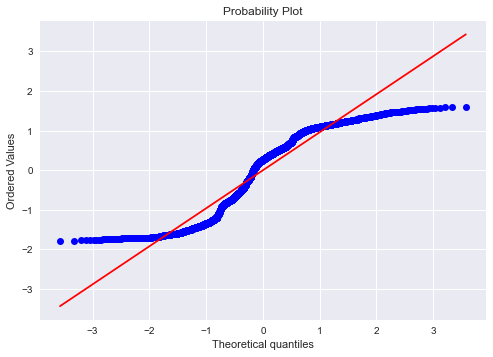

In [160]:
scipy_stats.probplot(std_res_jpy, dist="norm", plot=plt)

# Autocorrelation

# AR
- Positive autocorrelation at lag 1
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero

use PACF to get to know the order of AR() model

# MA
- Negative autocorrelation at lag 1
- ACF that drops sharply after a few lags
- PACF decreases more gradually

use ACF to get to know the order of the MA() model

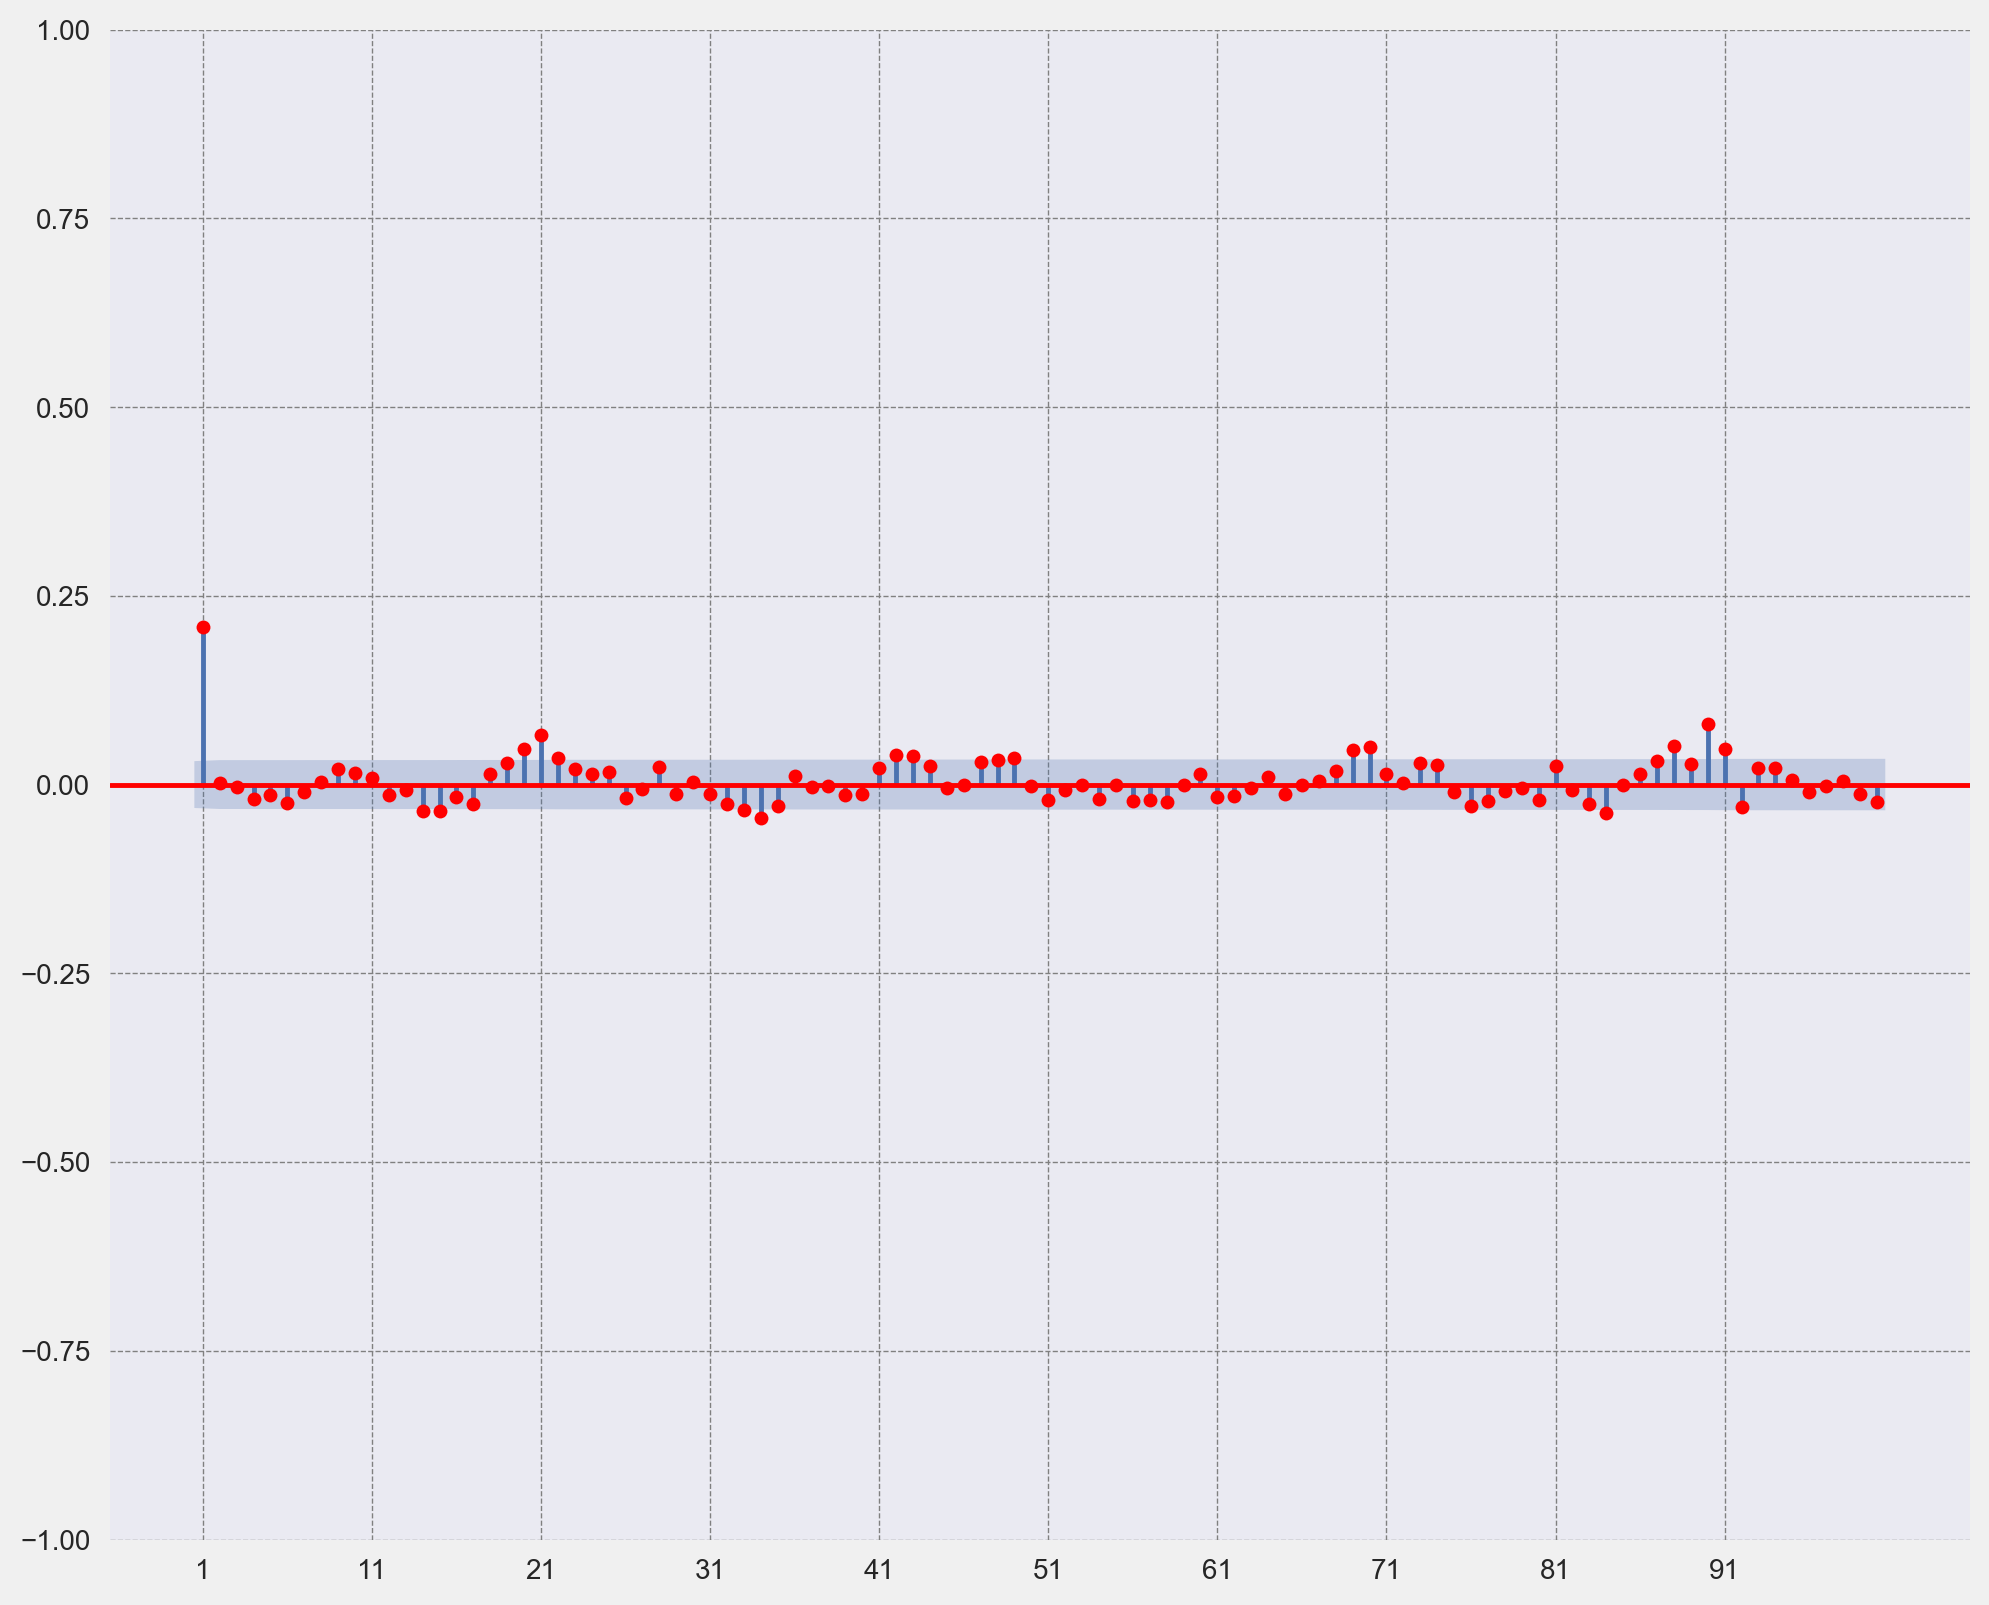

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#rgbpp acf
fig1, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0", figsize=(12,10), dpi=200)
plot_acf(std_res_rgbp, lags=100, alpha=0.05, zero=False, title=None, ax=ax, color="red")
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)
ax.set_xticks(np.arange(1, 101, step=10))

/home/whitecerberus/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


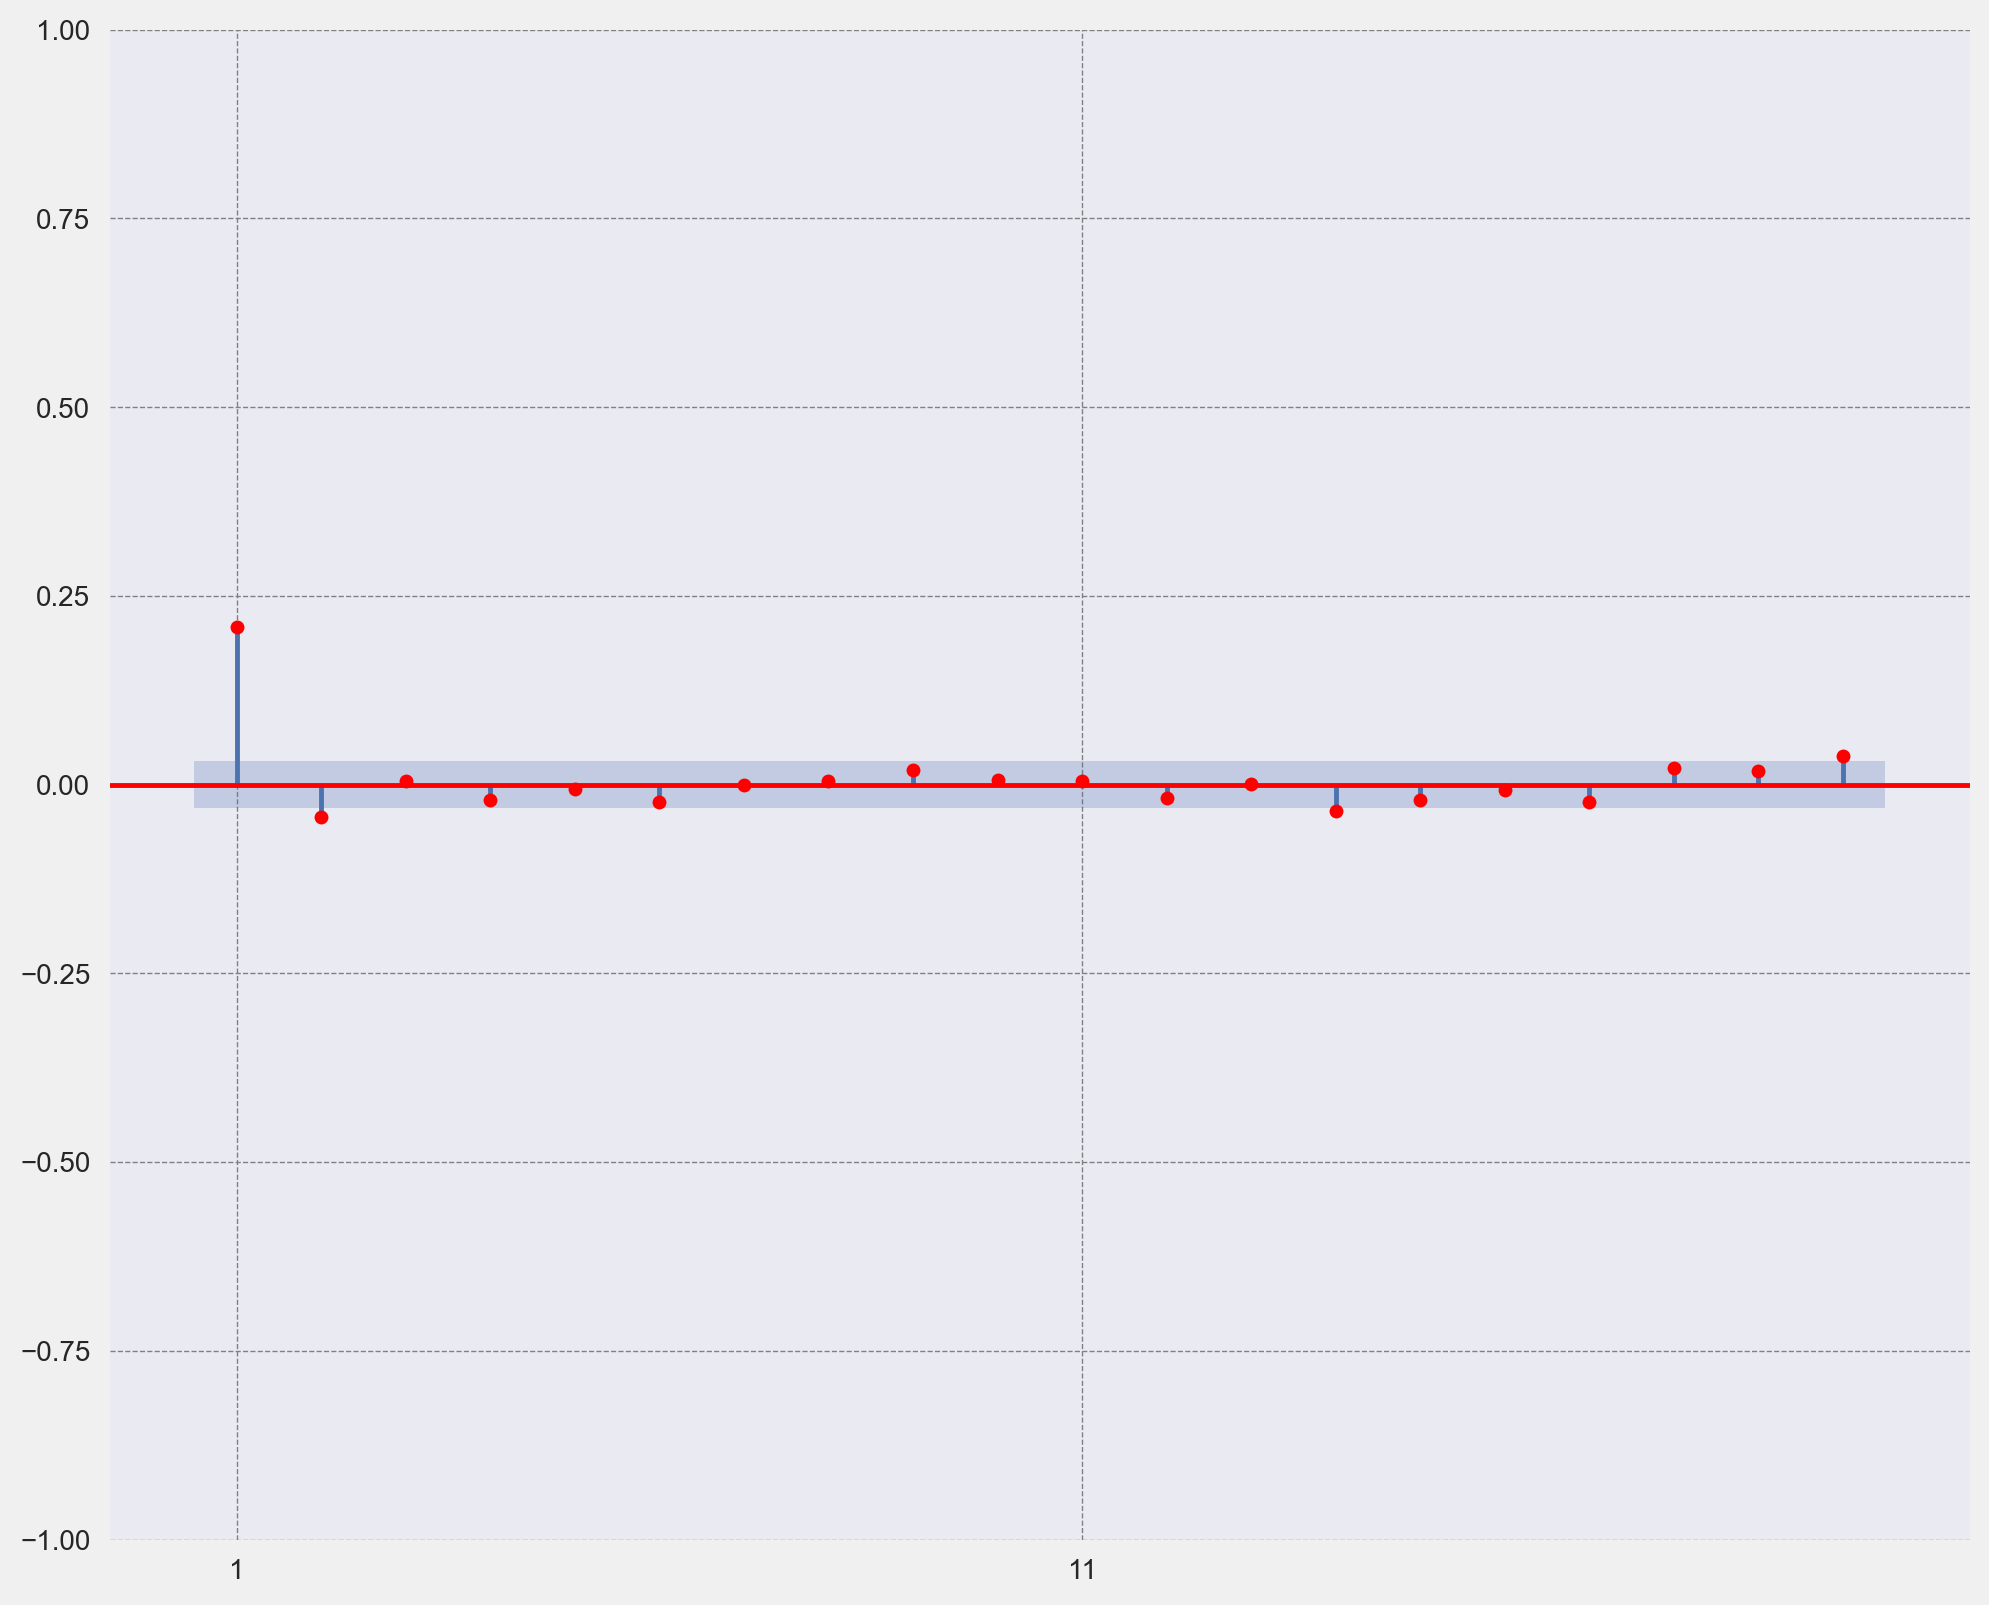

In [162]:
# plot pacf
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0", figsize=(12,10), dpi=200)
plot_pacf(std_res_rgbp, lags=20, alpha=0.05, zero=False, title=None, ax=ax, color="red")
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)
ax.set_xticks(np.arange(1, 21, step=10))

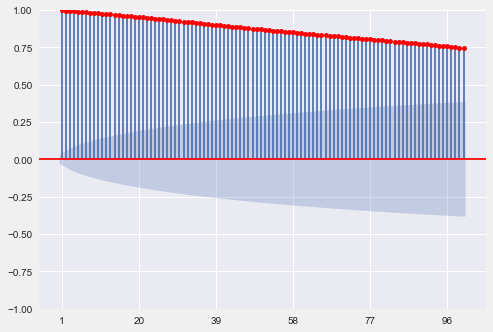

In [163]:
#eur
fig2, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0")
plot_acf(std_res_eur, lags=100, alpha=0.05, zero=False, title=None, ax=ax, color="red")
ax.set_xticks(np.arange(1, 101, step=19))

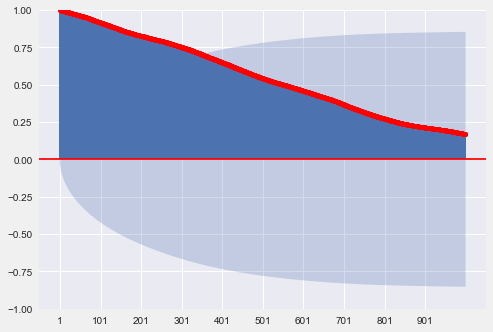

In [164]:
#jpy
fig3, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0")
plot_acf(std_res_jpy, lags=1000, alpha=0.05, zero=False, title=None, ax=ax, color="red")
ax.set_xticks(np.arange(1, 1001, step=100))

In [165]:
import statsmodels.stats.diagnostic

ljungboxtest = statsmodels.stats.diagnostic.acorr_ljungbox(std_res_rgbp, lags=100, boxpierce=False)
ljungboxtest

,lb_stat,lb_pvalue
1,174.502804,7.687449e-40
2,174.532050,1.261383e-38
3,174.578154,1.306884e-37
4,176.035684,5.294366e-37
5,176.775328,2.612317e-36
...,...,...
96,410.241860,1.910431e-40
97,410.253925,3.953590e-40
98,410.369664,7.822190e-40
99,411.069743,1.231510e-39


# AR

In [166]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

AR1 = AutoReg(rgbp, lags = 1).fit()
AR1.summary()
# ar1 = ARIMA(std_res_rgbp, order=(1,0, 0))
# ar1model = ar1.fit()
# ar1model.summary()

/home/whitecerberus/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   rgbp   No. Observations:                 3987
Model:                     AutoReg(1)   Log Likelihood               -2316.411
Method:               Conditional MLE   S.D. of innovations              0.433
Date:                Sat, 19 Mar 2022   AIC                           4638.822
Time:                        18:30:54   BIC                           4657.693
Sample:                    07-09-2002   HQIC                          4645.512
                         - 06-06-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.007     -0.025      0.980      -0.014       0.013
rgbp.L1        0.2091      0.015     13.503      0.000       0.179       0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7813           +0.0000j            4.7813            0.0000
-----------------------------------------------------------------------------
"""

# Standardize residuals

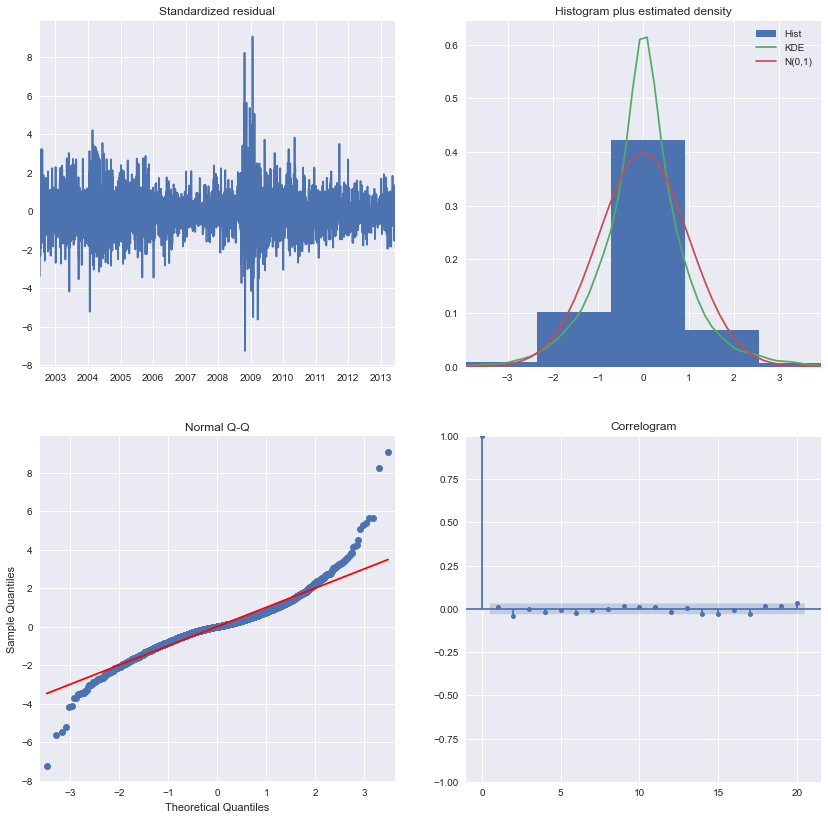

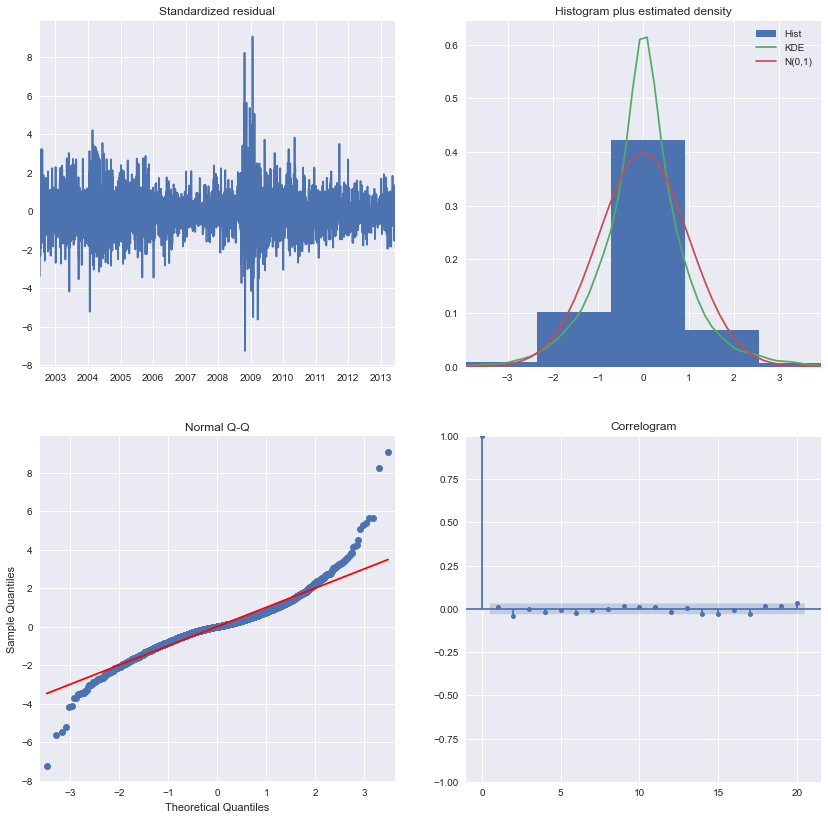

In [167]:
#residuals
#std _res_AR1 = AR1.resid /
AR1.plot_diagnostics(lags=20, figsize=(14,14))

In [168]:
#how to get stdres
std_resAR1 = AR1.resid / np.sqrt(AR1.sigma2)
std_resAR1

Date
2002-07-09   -3.364956
2002-07-10    0.104233
2002-07-11    0.342173
2002-07-12   -1.119847
2002-07-13    0.440778
                ...   
2013-06-02    0.343324
2013-06-03   -0.043685
2013-06-04   -0.984921
2013-06-05   -0.535280
2013-06-06   -0.446682
Length: 3986, dtype: float64

# GARCH estimation

In [169]:
from arch import arch_model

GARCH = arch_model(rgbp, p=1, q=1, mean='AR', lags=1)
GARCH = GARCH.fit()
GARCH.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 126275194.24008775
Iteration:      2,   Func. Count:     18,   Neg. LLF: 145109292.41390008
Iteration:      3,   Func. Count:     27,   Neg. LLF: 27624028297.556076
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1883.2715092992003
Iteration:      5,   Func. Count:     42,   Neg. LLF: 3467.0850113794586
Iteration:      6,   Func. Count:     49,   Neg. LLF: 59761.72491642155
Iteration:      7,   Func. Count:     58,   Neg. LLF: 3525.6390752884126
Iteration:      8,   Func. Count:     65,   Neg. LLF: 4254.438346785169
Iteration:      9,   Func. Count:     73,   Neg. LLF: 5045.808119223205
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1910.4820402549055
Iteration:     11,   Func. Count:     87,   Neg. LLF: 1860.3497819183767
Iteration:     12,   Func. Count:     94,   Neg. LLF: 9594.074355785882
Iteration:     13,   Func. Count:    102,   Neg. LLF: 1864.6816808635338
Iteration:     14,   Func. Count:    109,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   rgbp   R-squared:                       0.043
Mean Model:                        AR   Adj. R-squared:                  0.043
Vol Model:                      GARCH   Log-Likelihood:               -1856.48
Distribution:                  Normal   AIC:                           3722.96
Method:            Maximum Likelihood   BIC:                           3754.41
                                        No. Observations:                 3986
Date:                Sat, Mar 19 2022   Df Residuals:                     3984
Time:                        18:30:55   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -5.0091e-03  5.512e-03     -0.909      0.363 [-1.581e-02,5.795e-03]
rgbp[1]         0.2240  1.766e-02     12.681  7.583e-37      [  0.189,  0.259]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.1637e-04  2.389e-04      2.161  3.068e-02 [4.809e-05,9.846e-04]
alpha[1]       0.0308  5.020e-03      6.141  8.204e-10 [2.099e-02,4.066e-02]
beta[1]        0.9661  5.168e-03    186.957      0.000     [  0.956,  0.976]
============================================================================

Covariance estimator: robust
"""

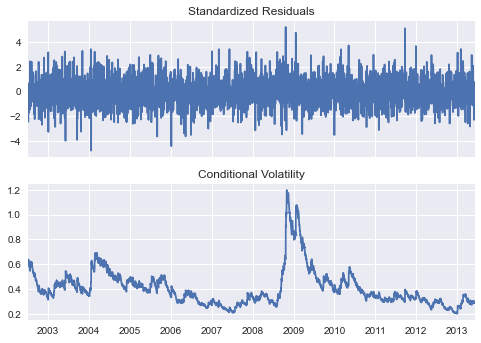

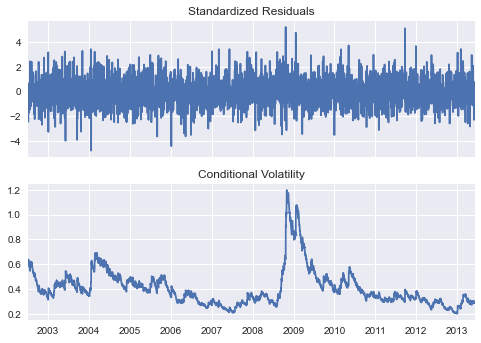

In [170]:
GARCH.plot()

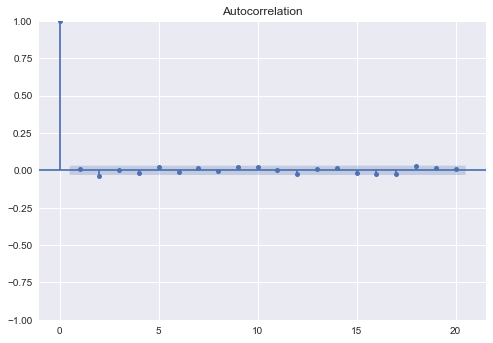

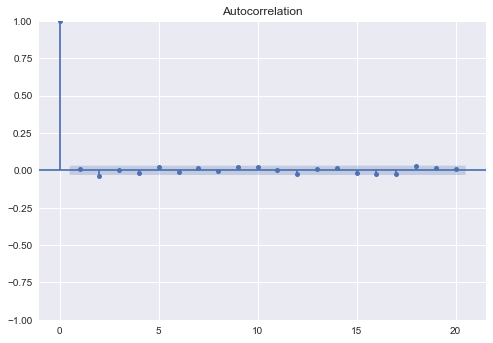

In [172]:
garch_res = GARCH.std_resid
garch_res.dropna(inplace=True)
plot_acf(garch_res, lags=20)

((array([-3.57684923, -3.33790455, -3.20602186, ...,  3.20602186,
          3.33790455,  3.57684923]),
  array([-4.75518017, -4.39965764, -3.96606739, ...,  4.74942488,
          5.09376336,  5.20546933])),
 (0.9920521615353955, 0.009480903160547489, 0.9914671999654325))

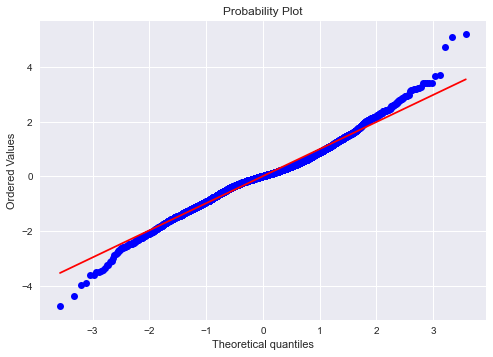

In [173]:
scipy_stats.probplot(garch_res, dist="norm", plot=plt)